# EDA
Exploratory Data Analysis (EDA) is a crucial, initial phase in data science where analysts use visualization and summary statistics to investigate datasets, detecting anomalies and uncovering patterns without strict hypotheses. It is an iterative, "detective" process to understand data structure, test assumptions, and identify key variables before formal modeling.

Key aspects of EDA include:
- Goal: To understand data, spot outliers, and test assumptions
- Techniques: Data cleaning, visualization (graphs/plots), and descriptive statistics
- Key Steps: Univariate (one variable), bivariate (two), and multivariate (multiple) analysis
- Tools: Frequently performed using Python (Pandas, Matplotlib, Seaborn) or R


# Loading Dataset

In [1]:
import pandas as pd
data=pd.read_csv('/content/data_clean.csv')
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [2]:
# Taking a deep copy of the DataFrame to create a backup.
# Using `deep=True` ensures that `data_backup` is an independent copy,
# so any modifications to `data` will not affect this backup.
data_backup = data.copy(deep=True)

# Looking into the structure of the table

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
data.isnull().sum()

,0
Unnamed: 0,0
Ozone,38
Solar.R,7
Wind,0
Temp C,0
Month,0
Day,0
Year,0
Temp,0
Weather,3


In [5]:
data.shape

(158, 10)

In [6]:
data.describe() # Basic statistics

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,158.000000,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,79.500000,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,45.754781,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,40.250000,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,79.500000,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,118.750000,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


From dasta.info(), we get to know that the datatype of month and temperature columns are object and not integer. Further investigation needed


In [7]:
print(data['Month'].dtype)
print("# Converting the str data type in data['Month'] to int dtype")
try:
  data['Month']=pd.to_numeric(data['Month'])
  print(data['Month'].dtype)
except:
  print()

# ValueError: Unable to parse string "May" at position 23


object
# Converting the str data type in data['Month'] to int dtype



In [8]:
# ValueError: Unable to parse string "May" at position 23
#Explicitly changint the value at the 23rd position of Month column to int type
data['Month']=data['Month'].replace('May',5)

In [9]:
data['Month'].head(25)
data['Month']=pd.to_numeric(data['Month'])

In [10]:
# Convert 'Month', 'Temp C', and 'Weather' columns to numeric types.
# The 'errors="coerce"' parameter will replace any non-numeric values with NaN (Not a Number).
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')
data['Weather']=data['Weather'].astype('category')
# Other useful parameters for pd.to_numeric:
# - errors: 'raise' (default), 'coerce', 'ignore'
#   'raise': invalid parsing will raise an exception
#   'coerce': invalid parsing will be set as NaN
#   'ignore': invalid parsing will return the input
# - downcast: 'integer', 'signed', 'unsigned', 'float'
#   If specified, and the data has been successfully converted to a numeric type,
#   pandas will attempt to downcast to the smallest numeric dtype possible (e.g., int64 to int32).

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  158 non-null    int64   
 1   Ozone       120 non-null    float64 
 2   Solar.R     151 non-null    float64 
 3   Wind        158 non-null    float64 
 4   Temp C      157 non-null    float64 
 5   Month       158 non-null    int64   
 6   Day         158 non-null    int64   
 7   Year        158 non-null    int64   
 8   Temp        158 non-null    int64   
 9   Weather     155 non-null    category
dtypes: category(1), float64(4), int64(5)
memory usage: 11.5 KB


In [12]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
153,False
154,False
155,False
156,False


In [13]:
# This code snippet first identifies all fully duplicated rows in the 'data' DataFrame
# using `data.duplicated()`. It then filters the DataFrame to show only these duplicated
# rows and finally returns the `.shape` (number of rows, number of columns) of this subset.
# The first element of the shape tuple indicates the count of duplicated rows.
data[data.duplicated()].shape

(0, 10)

In [14]:
data.duplicated().sum() # Counts the total number of fully duplicated rows

np.int64(0)

In [15]:
# This code snippet filters the DataFrame to display all rows that are exact duplicates.
# It first identifies duplicated rows using `data.duplicated()` (which marks the second and subsequent occurrences as True),
# and then uses boolean indexing to select and show only those identified duplicate rows.
data[data.duplicated()]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather


In [16]:
data=data.drop_duplicates() # Removes duplicate rows from the DataFrame, keeping the first occurrence.

In [17]:
data.shape

(158, 10)

In [18]:
data_backup1= data.copy(deep=True)

In [19]:
# Now truncating 'Unnamed: 0' column, as it is found to be unnecessary.
# In pandas, when using methods like `drop`, the `axis` parameter specifies whether to drop labels from the index (rows) or columns.
# `axis=0` (or `axis='index'`) refers to rows.
# `axis=1` (or `axis='columns'`) refers to columns.
# Since 'Unnamed: 0' is a column that we want to remove, we set `axis=1`.
data = data.drop('Unnamed: 0', axis=1) # This line was causing an error as the column no longer exists.

In [20]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5,1,2010,67,S
1,36.0,118.0,8.0,72.0,5,2,2010,72,C
2,12.0,149.0,12.6,74.0,5,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5,4,2010,62,S
4,NaN,NaN,14.3,56.0,5,5,2010,56,S


In [21]:
# Renaming the column 'Solar.R' to Solar as it may create some unseen problem in future
data=data.rename({'Solar.R':'Solar'},axis=1)
data.head()

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5,1,2010,67,S
1,36.0,118.0,8.0,72.0,5,2,2010,72,C
2,12.0,149.0,12.6,74.0,5,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5,4,2010,62,S
4,NaN,NaN,14.3,56.0,5,5,2010,56,S


In [22]:
data.head()
# Temp C and Temp have same values but one is float, other in int

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5,1,2010,67,S
1,36.0,118.0,8.0,72.0,5,2,2010,72,C
2,12.0,149.0,12.6,74.0,5,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5,4,2010,62,S
4,NaN,NaN,14.3,56.0,5,5,2010,56,S


In [23]:
data=data.drop(['Temp C'], axis=1)

In [24]:
data.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S


# Handling missing values/ NaNs

In [25]:
cols=data.columns
print(cols)

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')


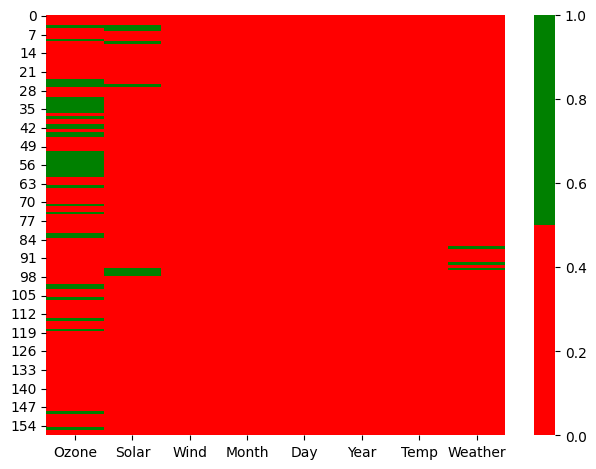

In [26]:
# Finding NaNs using seaborn spatial graph
import seaborn as sns
import matplotlib.pyplot as plt

cols=data.columns # Get column names from the DataFrame
colors=['r','g'] # Define a list of colors for the heatmap (red for non-missing, green for missing)
sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(colors)) # Create a heatmap to visualize missing values. Green represents missing values (NaN).
plt.tight_layout() # Adjust plot parameters for a tight layout
plt.show() # Display the plot

In [27]:
data.isnull().sum()

,0
Ozone,38
Solar,7
Wind,0
Month,0
Day,0
Year,0
Temp,0
Weather,3


# Handling missing values using Impute

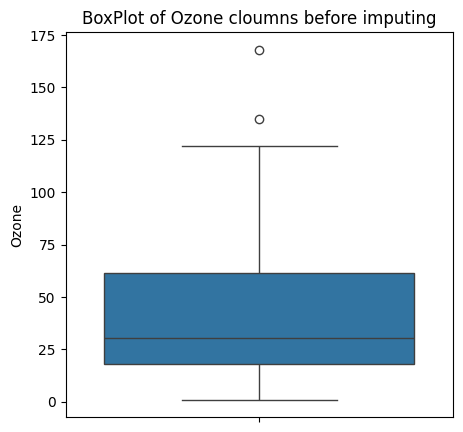

In [28]:
# Using boxplot to identify outliers
plt.figure(figsize=(5,5))
sns.boxplot(y=data['Ozone'])
plt.title("BoxPlot of Ozone cloumns before imputing")
plt.show()

In [29]:
# From the above boxplot, we can identify, there are outliers, hence we need to confirm it using other statistical methods
#1. calculating Q1, Q3
Q1=data['Ozone'].quantile(0.25)
Q3=data['Ozone'].quantile(0.75)
IQR=Q3-Q1

# Defining outlier bounds
# The lower bound is calculated as Q1 - 1.5 * IQR. Any data point below this value is considered an outlier.
lower_bound=Q1-1.5*IQR
# The upper bound is calculated as Q3 + 1.5 * IQR. Any data point above this value is considered an outlier.
upper_bound=Q3+1.5*IQR

# Finding Outliers
outliers=data[(data['Ozone']<lower_bound) | (data['Ozone']>upper_bound)]
print(f"Number of outliers in Ozone Column= {outliers.shape[0]}")

outliers=data[(data['Ozone']<lower_bound) | (data['Ozone']>upper_bound)]
print(f" outliers in Ozone Column=\n {outliers}")

Number of outliers in Ozone Column= 2
 outliers in Ozone Column=
      Ozone  Solar  Wind  Month  Day  Year  Temp Weather
61   135.0  269.0   4.1      7    1  2010    84       S
116  168.0  238.0   3.4      8   25  2010    81      PS


In [30]:
# Now filling Ozone NaNs with median
ozone_median=data["Ozone"].median()
print('Ozone median: ', ozone_median)
data['Ozone'].fillna(ozone_median, inplace=True)
print("New Ozone column after imputing\n", data['Ozone'].head())
print('Checking for Nans in "Ozone" column: ',data['Ozone'].isnull().sum())

Ozone median:  30.5
New Ozone column after imputing
 0    41.0
1    36.0
2    12.0
3    18.0
4    30.5
Name: Ozone, dtype: float64
Checking for Nans in "Ozone" column:  0


/tmp/ipython-input-3053930162.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Ozone'].fillna(ozone_median, inplace=True)


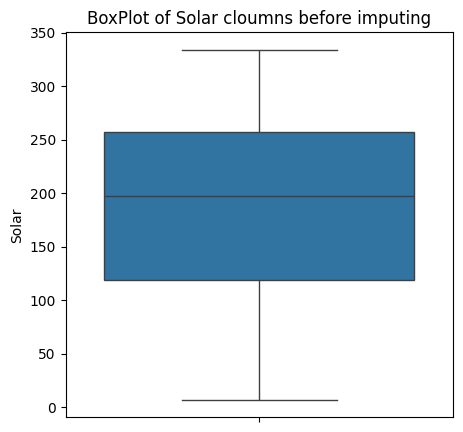

In [31]:
# Using boxplot to identify outliers in Solar Column
plt.figure(figsize=(5,5))
sns.boxplot(y=data['Solar'])
plt.title("BoxPlot of Solar cloumns before imputing")
plt.show()

Found 0 outliers in Solar BoxPlot

In [32]:
# Replacing NaNs in Solar column with Mean
mean_value=data['Solar'].mean()
mean_value

np.float64(185.40397350993376)

In [33]:
data['Solar'].fillna(mean_value, inplace=True)
data['Solar'].head()


/tmp/ipython-input-2204034444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Solar'].fillna(mean_value, inplace=True)


,Solar
0,190.000000
1,118.000000
2,149.000000
3,313.000000
4,185.403974


In [34]:
data['Solar'].isnull().sum()

np.int64(0)

In [35]:
print('missing values in weather column',data['Weather'].isnull().sum())

missing values in weather column 3


In [36]:
# Checking for the most frequent occurrence of weather type, i.e., mode
# The .mode() method returns a Series (as there can be multiple modes with the same frequency).
# We use [0] to select the first mode in case of multiple modes, or the single mode if unique.
weather_mode=data['Weather'].mode()[0]
print(weather_mode)

S


In [37]:
data['Weather'] = data['Weather'].fillna(weather_mode)
print('Checking for NaNs in "Weather" column after imputation:', data['Weather'].isnull().sum())

Checking for NaNs in "Weather" column after imputation: 0


In [38]:
print("after imputation, the missing values in each columns are",data.isnull().sum())

after imputation, the missing values in each columns are Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64


# Detecting outliers in whole csv

<Axes: >

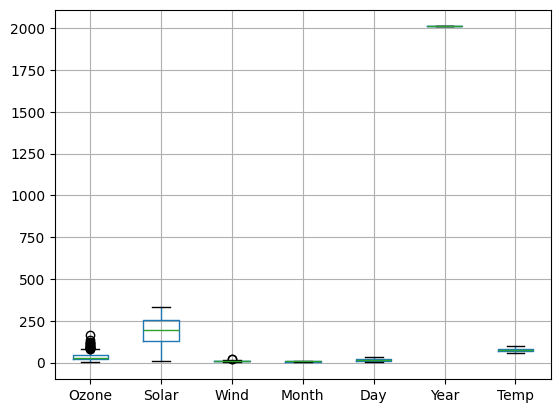

In [39]:
# Generates box plots for all numerical columns in the DataFrame. This visualization helps to:
# - Understand the distribution of data for each numerical feature.
# - Identify potential outliers which appear as points beyond the 'whiskers' of the box plots.
# - Compare the spread and central tendency of different features at a glance.
data.boxplot()

From the above boxplot, we can infer that there are still some outliers, but not clear how many, so we perform manual statistical test (IQR)

In [40]:
Q1=data['Wind'].quantile(0.25)
Q3=data['Wind'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=data[(data['Wind']<lower_bound) | (data['Wind']>upper_bound)]
print(f"Number of outliers in Wind Column= {outliers.shape[0]}")


Number of outliers in Wind Column= 2


In [41]:
wind_median=data['Wind'].median()
print(wind_median)

9.7


In [42]:
print("Now replacing the outliers in Wind columns using Median")
data.loc[data['Wind']<lower_bound, 'Wind']= wind_median
data.loc[data['Wind']>upper_bound ,'Wind']= wind_median
print('Successfully Replaced')

Now replacing the outliers in Wind columns using Median
Successfully Replaced


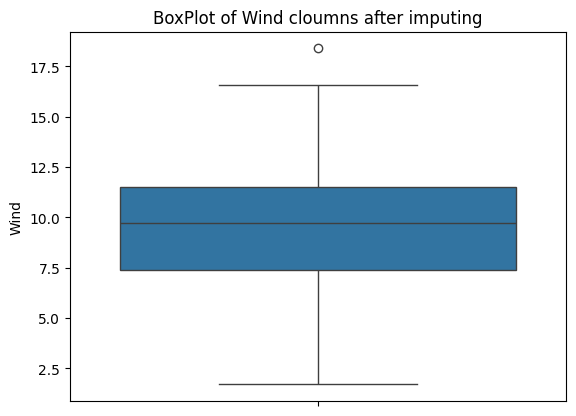

In [43]:
sns.boxplot(y=data['Wind'])
plt.title("BoxPlot of Wind cloumns after imputing")
plt.show()

Still we can see some outliers in the above box plot, this can be due to newly recalculated IQR after imputation. This is not necessarily a bad data, but a statistical boundary shifting

In [44]:
outliers=data[(data['Wind']<lower_bound) | (data['Wind']>upper_bound)]
print(f"Number of outliers in Wind Column after imputation = {outliers.shape[0]}")

Number of outliers in Wind Column after imputation = 0


In [45]:
Q1=data['Ozone'].quantile(0.25)
Q3=data['Ozone'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_Ozone=data[(data['Ozone']<lower_bound) | (data['Ozone']>upper_bound)]
print(f"Number of outliers in Ozone Column before imputation = {outliers_Ozone.shape[0]}")


Number of outliers in Ozone Column before imputation = 16


In [46]:
print("Now replacing the outliers in Ozone columns using Median")
data.loc[data['Ozone']<lower_bound, 'Ozone']= wind_median
data.loc[data['Ozone']>upper_bound ,'Ozone']= wind_median
print('Successfully Replaced')

Now replacing the outliers in Ozone columns using Median
Successfully Replaced


In [47]:
outliers_Ozone1=data[(data['Ozone']<lower_bound) | (data['Ozone']>upper_bound)]
print(f"Number of outliers in Ozone Column after imputation = {outliers_Ozone1.shape[0]}")

Number of outliers in Ozone Column after imputation = 0


# Scatter Plot & Correlation Analysis

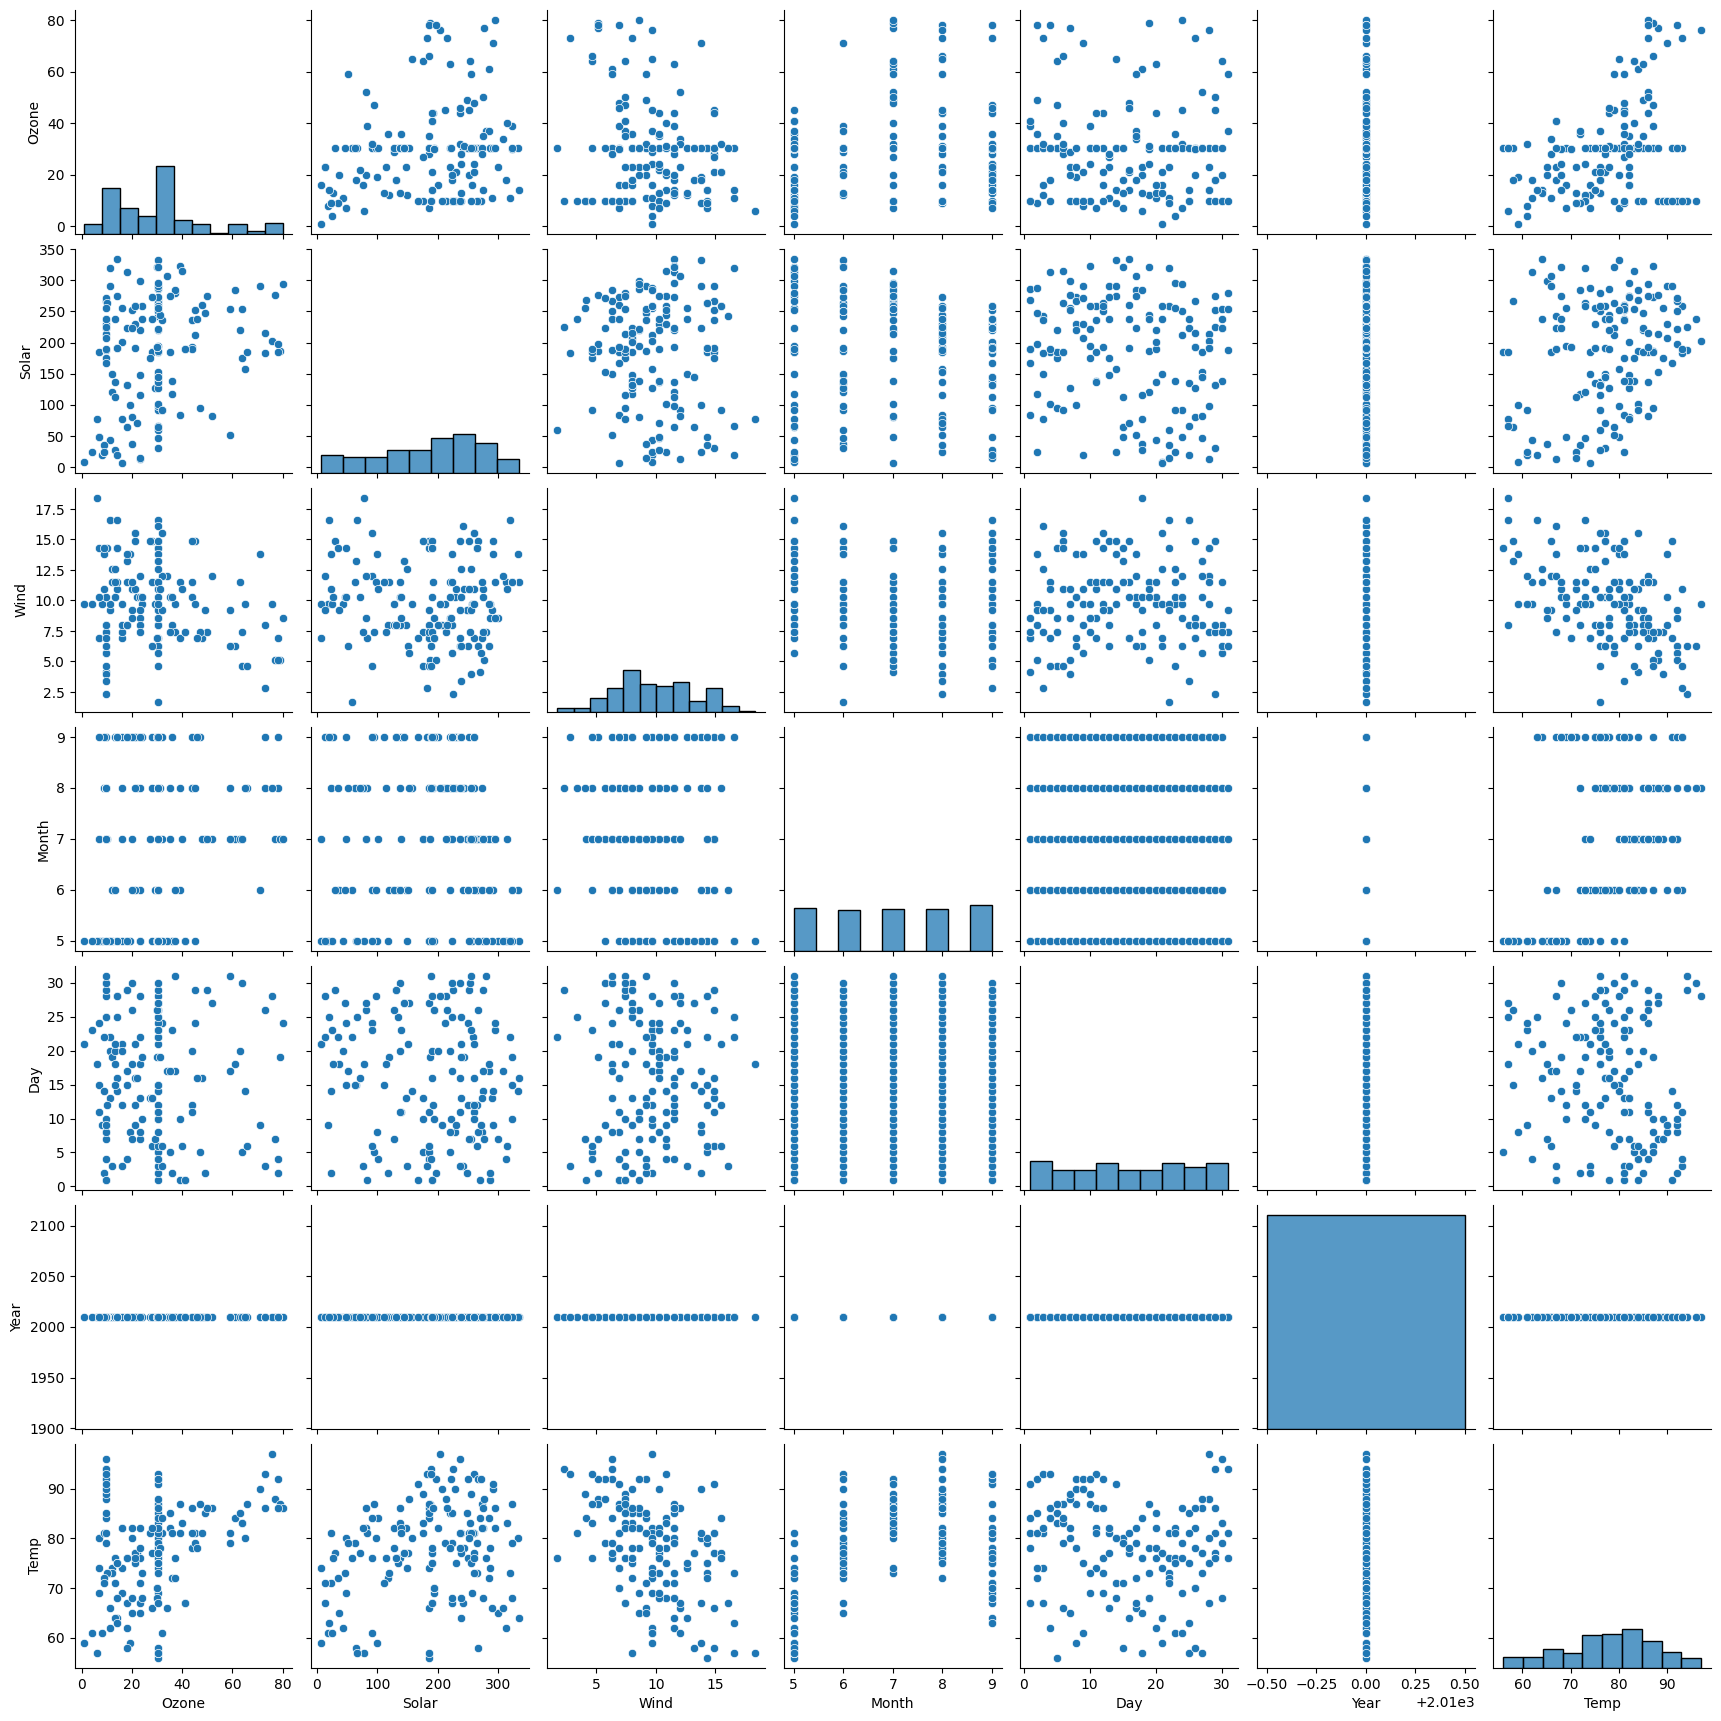

In [48]:
import seaborn as sns
sns.pairplot(data)

In [49]:
# Calculate the correlation matrix for numerical columns only.
# The 'Weather' column is categorical and caused a ValueError when trying to convert to float.
# Exclude non-numeric columns from the correlation calculation.
data.select_dtypes(include=['number']).corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.216968,-0.195382,0.069254,-0.061222,NaN,0.333040
Solar,0.216968,1.000000,-0.044178,-0.079196,-0.149606,NaN,0.260473
Wind,-0.195382,-0.044178,1.000000,-0.123958,0.055928,NaN,-0.420121
Month,0.069254,-0.079196,-0.123958,1.000000,0.052646,NaN,0.402942
Day,-0.061222,-0.149606,0.055928,0.052646,1.000000,NaN,-0.124538
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.333040,0.260473,-0.420121,0.402942,-0.124538,NaN,1.000000


# Dummy/ Indicator Variable
A dummy variable (or indicator variable) is a numerical, binary variable (0 or 1) used to represent categorical data in machine learning models, with 1 representing the presence of a category and 0 its absence. They are essential because algorithms like linear regression require numerical inputs and cannot interpret categorical labels directly, preventing false ordinal relationships (e.g., assigning 1, 2, 3 to categories).

Why Dummy Variables are Required:
- Numerical Transformation: Most machine learning models (regression, SVM, KNN) require input data to be in numerical format for mathematical calculations
- Preventing False Ordering: Simply assigning numbers to categories (e.g., Red=1, Blue=2) implies a ranking (1 < 2) that does not exist. Dummy variables create independent columns for each category
- Representation of Nominal Data: They transform qualitative, non-numeric information (e.g., gender, city, color) into a format that quantifies the presence of that category

How They Work (Example):
If you have a "Color" column with "Red", "Green", and "Blue", you create three dummy variables:
- Is_Red: 1 if Red, 0 otherwise
- Is_Green: 1 if Green, 0 otherwise
- Is_Blue: 1 if Blue, 0 otherwise

Avoiding the "Dummy Variable Trap":
To avoid perfect multicollinearity—where one variable can be perfectly predicted from others (e.g., if you know it's not red and not green, it must be blue)—you should always remove one of the dummy variables (the base/reference category). This is known as the dummy variable trap.

In [50]:
# Create dummy variables for the 'Weather' categorical column using pd.get_dummies.
data=pd.get_dummies(data,columns=['Weather'])
data.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7.4,5,1,2010,67,False,False,True
1,36.0,118.000000,8.0,5,2,2010,72,True,False,False
2,12.0,149.000000,12.6,5,3,2010,74,False,True,False
3,18.0,313.000000,11.5,5,4,2010,62,False,False,True
4,30.5,185.403974,14.3,5,5,2010,56,False,False,True


In [51]:
# Converting the dummy vars to int type
for col in ['Weather_C', 'Weather_PS', 'Weather_S']:
    data[col] = data[col].astype(int)
data.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7.4,5,1,2010,67,0,0,1
1,36.0,118.000000,8.0,5,2,2010,72,1,0,0
2,12.0,149.000000,12.6,5,3,2010,74,0,1,0
3,18.0,313.000000,11.5,5,4,2010,62,0,0,1
4,30.5,185.403974,14.3,5,5,2010,56,0,0,1


# Normalizing the data
- standardScalar
- MinMaxScalar

In [52]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [53]:
data_arr=data.values

In [54]:
scaling=MinMaxScaler(feature_range=(0,1))
# Initialize MinMaxScaler to scale features to a range of (0, 1)
rescaledX=scaling.fit_transform(data_arr)
# Fit the scaler to the data and then transform it to the defined range

In [55]:
# Get column names from the original 'data' DataFrame
# This assumes you want to retain the column names after scaling
scaled_df = pd.DataFrame(rescaledX, columns=data.columns)

# Display the head of the new DataFrame to verify
print("Scaled DataFrame head:")
print(scaled_df.head())

# Save the DataFrame to a CSV file
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
scaled_df.to_csv('min_max_scaled_data.csv', index=False)

print("\nScaled data saved to 'min_max_scaled_data.csv'")

Scaled DataFrame head:
      Ozone     Solar      Wind  Month       Day  Year      Temp  Weather_C  \
0  0.506329  0.559633  0.341317    0.0  0.000000   0.0  0.268293        0.0   
1  0.443038  0.339450  0.377246    0.0  0.033333   0.0  0.390244        1.0   
2  0.139241  0.434251  0.652695    0.0  0.066667   0.0  0.439024        0.0   
3  0.215190  0.935780  0.586826    0.0  0.100000   0.0  0.146341        0.0   
4  0.373418  0.545578  0.754491    0.0  0.133333   0.0  0.000000        0.0   

   Weather_PS  Weather_S  
0         0.0        1.0  
1         0.0        0.0  
2         1.0        0.0  
3         0.0        1.0  
4         0.0        1.0  

Scaled data saved to 'min_max_scaled_data.csv'


In [56]:
set_printoptions(precision=4)
print(rescaledX[0:5,:]) # Print the first 5 rows and all columns of the rescaled data

[[0.5063 0.5596 0.3413 0.     0.     0.     0.2683 0.     0.     1.    ]
 [0.443  0.3394 0.3772 0.     0.0333 0.     0.3902 1.     0.     0.    ]
 [0.1392 0.4343 0.6527 0.     0.0667 0.     0.439  0.     1.     0.    ]
 [0.2152 0.9358 0.5868 0.     0.1    0.     0.1463 0.     0.     1.    ]
 [0.3734 0.5456 0.7545 0.     0.1333 0.     0.     0.     0.     1.    ]]


In [57]:
set_printoptions(precision=4)
print(rescaledX[:,:]) # Print all rows and all columns of the rescaled data

[[0.5063 0.5596 0.3413 ... 0.     0.     1.    ]
 [0.443  0.3394 0.3772 ... 1.     0.     0.    ]
 [0.1392 0.4343 0.6527 ... 0.     1.     0.    ]
 ...
 [0.3734 0.422  0.6886 ... 0.     0.     1.    ]
 [0.1646 0.5627 0.7545 ... 0.     0.     1.    ]
 [0.2152 0.3792 0.3772 ... 1.     0.     0.    ]]


# MinMax vs Standardization
MinMaxScaler and StandardScaler are both preprocessing tools in scikit-learn used to scale numerical features, but they do so in fundamentally different ways suited to different data scenarios. MinMaxScaler transforms data into a fixed, bounded range (0 to 1), whereas StandardScaler centers data around a mean of 0 with a standard deviation of 1.

Quick Comparison Table:
| Feature | MinMaxScaler (Normalization) | StandardScaler (Standardization) |
|---------|------------------------------|----------------------------------|
| Formula | (x - min) / (max - min) | (x - mean) / std |
| Output Range | Usually [0, 1] | No specific bound |
| Result | Data falls in a fixed, small range | Data has mean=0 and std=1 |
| Outliers | Very Sensitive (squashes inliers) | Sensitive (less dramatic impact) |
| Shape | Preserves original shape/distribution | Does not necessarily follow Gaussian |
| Best For | Neural networks, CNN, KNN, Image data | PCA, Linear/Logistic Regression, SVM |

Deep Dive: MinMaxScaler
How it works: It shrinks the data within a specified range, typically 0 to 1, based on the maximum and minimum values.
When to Use:
- When you need a bounded range, such as in Neural Networks where inputs are expected between 0-1 or -1 to 1
- When the algorithm does not assume any specific distribution (like Gaussian)
- When you need to preserve zero entries in sparse data
Drawback: It is highly sensitive to outliers. A single massive outlier can compress all other data points into a tiny, indistinguishable range (e.g., between 0 and 0.01).

Deep Dive: StandardScaler
How it works: It standardizes features by removing the mean and scaling to unit variance. The formula is (x - mean) / std.
When to Use:
- When your data follows a normal (Gaussian) distribution
- For algorithms that assume or benefit from centered, unit-variance data, such as Linear Regression, Logistic Regression, and PCA
- As a default for most machine learning algorithms when in doubt
Drawback: It does not guarantee a bounded range, which can be problematic for neural networks.

Which One to Use?
- Default Choice: Start with StandardScaler as a default, especially if your data is roughly normally distributed or you are using linear models
- Bounded Data: If your algorithm requires input to be in a tight, predefined range (like Neural Networks or pixels [0,255]), use MinMaxScaler
- Outliers: If your data contains significant outliers, consider RobustScaler instead of either

Crucial Practical Note:
Never use fit_transform on the entire dataset before splitting. This causes data leakage, as information from the test set leaks into the training process.
Correct Procedure: Use fit_transform on the training set, and then only transform on the testing/validation set.

In [58]:
scaling=StandardScaler().fit(data_arr) # Initialize StandardScaler and fit it to the data to learn mean and standard deviation
rescaledX=scaling.transform(data_arr) # Transform the data using the learned mean and standard deviation

In [59]:
set_printoptions(precision=4)
print(rescaledX[0:5,:])

[[ 0.6534  0.0532 -0.7353 -1.4169 -1.6732  0.     -1.1476 -0.6705 -0.6507
   1.2443]
 [ 0.3753 -0.7797 -0.5531 -1.4169 -1.5617  0.     -0.6127  1.4915 -0.6507
  -0.8036]
 [-0.9599 -0.4211  0.8432 -1.4169 -1.4502  0.     -0.3988 -0.6705  1.5368
  -0.8036]
 [-0.6261  1.476   0.5093 -1.4169 -1.3387  0.     -1.6825 -0.6705 -0.6507
   1.2443]
 [ 0.0693  0.      1.3593 -1.4169 -1.2272  0.     -2.3243 -0.6705 -0.6507
   1.2443]]


In [60]:
# Get column names from the original 'data' DataFrame
# This assumes you want to retain the column names after scaling
scaled_df = pd.DataFrame(rescaledX, columns=data.columns)

# Display the head of the new DataFrame to verify
print("Scaled DataFrame head:")
print(scaled_df.head())

# Save the DataFrame to a CSV file
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
scaled_df.to_csv('std_scaled_data.csv', index=False)

print("\nScaled data saved to 'std_scaled_data.csv'")

Scaled DataFrame head:
      Ozone     Solar      Wind     Month       Day  Year      Temp  \
0  0.653419  0.053165 -0.735270 -1.416904 -1.673198   0.0 -1.147590   
1  0.375263 -0.779707 -0.553134 -1.416904 -1.561699   0.0 -0.612725   
2 -0.959882 -0.421109  0.843246 -1.416904 -1.450199   0.0 -0.398779   
3 -0.626096  1.475990  0.509329 -1.416904 -1.338700   0.0 -1.682455   
4  0.069292  0.000000  1.359299 -1.416904 -1.227200   0.0 -2.324293   

   Weather_C  Weather_PS  Weather_S  
0  -0.670478   -0.650710   1.244342  
1   1.491472   -0.650710  -0.803638  
2  -0.670478    1.536783  -0.803638  
3  -0.670478   -0.650710   1.244342  
4  -0.670478   -0.650710   1.244342  

Scaled data saved to 'std_scaled_data.csv'
